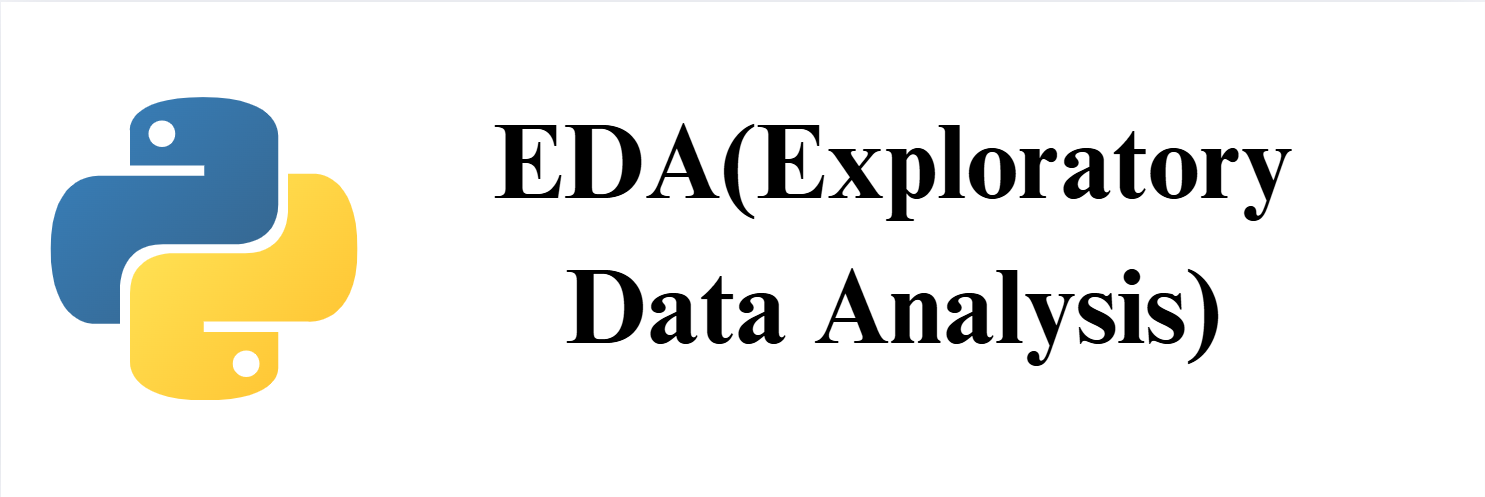

# **EDA(Exploratory Data Analysis)**

EDA is essential for understanding the underlying patterns, relationships, and structures within data. It helps in detecting outliers, testing assumptions, and forming hypotheses. Without EDA, data analysis is like navigating in the dark.

1. Variable Identification
2. Univariate Analysis
3. Bivariate Analysis
4. Outlier Treatment
5. Missing Value Treatment
6. Variable Creation
7. Variable Transformation

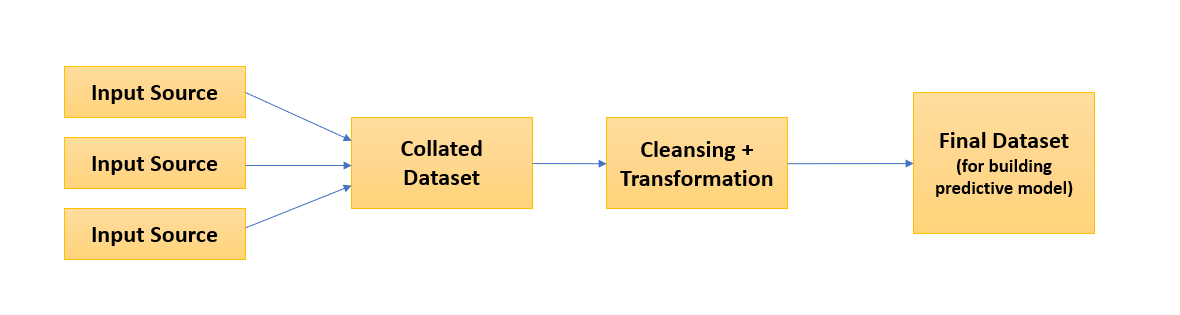

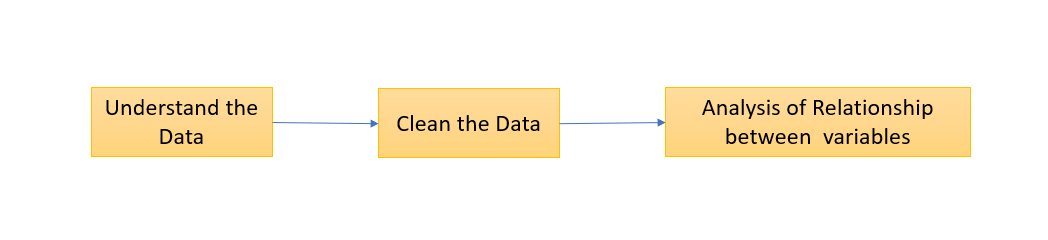

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw=pd.read_excel("/content/drive/MyDrive/FSDS @Kodi Senapati/Datasets/Rawdata.xlsx")

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/FSDS @Kodi Senapati/Datasets/Rawdata.xlsx")

In [ ]:
print(df)

     Name          Domain       Age   Location   Salary      Exp
0    Mike   Datascience#$  34 years     Mumbai   5^00#0       2+
1  Teddy^         Testing    45' yr  Bangalore  10%%000       <3
2   Uma#r  Dataanalyst^^#       NaN        NaN  1$5%000   4> yrs
3    Jane     Ana^^lytics       NaN   Hyderbad   2000^0      NaN
4  Uttam*      Statistics     67-yr        NaN   30000-  5+ year
5     Kim             NLP      55yr      Delhi  6000^$0      10+


In [ ]:
print(df.shape)
print(df.columns)

(6, 6)
Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      6 non-null      object
 1   Domain    6 non-null      object
 2   Age       4 non-null      object
 3   Location  4 non-null      object
 4   Salary    6 non-null      object
 5   Exp       5 non-null      object
dtypes: object(6)
memory usage: 416.0+ bytes
None


In [ ]:
df.isnull().sum()

,0
Name,0
Domain,0
Age,2
Location,2
Salary,0
Exp,1


**Initially before applying EDA technique cleaning of data is required.**

In [ ]:
df['Name']

,Name
0,Mike
1,Teddy^
2,Uma#r
3,Jane
4,Uttam*
5,Kim


In [ ]:
# Remove non word by replacing it with ''

df['Name']=df['Name'].str.replace(r'\W','',regex=True)

print(df['Name'])


0     Mike
1    Teddy
2     Umar
3     Jane
4    Uttam
5      Kim
Name: Name, dtype: object


In [ ]:
df['Domain']

,Domain
0,Datascience#$
1,Testing
2,Dataanalyst^^#
3,Ana^^lytics
4,Statistics
5,NLP


In [ ]:
df['Domain']=df['Domain'].str.replace(r'\W','',regex=True)
df['Domain']

,Domain
0,Datascience
1,Testing
2,Dataanalyst
3,Analytics
4,Statistics
5,NLP


In [ ]:
df

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34 years,Mumbai,5^00#0,2+
1,Teddy,Testing,45' yr,Bangalore,10%%000,<3
2,Umar,Dataanalyst,NaN,NaN,1$5%000,4> yrs
3,Jane,Analytics,NaN,Hyderbad,2000^0,NaN
4,Uttam,Statistics,67-yr,NaN,30000-,5+ year
5,Kim,NLP,55yr,Delhi,6000^$0,10+


In [ ]:
df['Age']=df['Age'].str.replace(r'\W','',regex=True)
df['Age']

# This removes non word characters but years,yr are word characters

,Age
0,34years
1,45yr
2,NaN
3,NaN
4,67yr
5,55yr


In [ ]:
df['Age']=df['Age'].str.extract('(\d+)')
df['Age']

,Age
0,34
1,45
2,NaN
3,NaN
4,67
5,55


In [ ]:
df['Location']

,Location
0,Mumbai
1,Bangalore
2,NaN
3,Hyderbad
4,NaN
5,Delhi


In [ ]:
df['Salary']

,Salary
0,5^00#0
1,10%%000
2,1$5%000
3,2000^0
4,30000-
5,6000^$0


In [ ]:
df['Salary']=df['Salary'].str.replace(r'\W',"",regex=True)
df['Salary']

,Salary
0,5000
1,10000
2,15000
3,20000
4,30000
5,60000


In [ ]:
df['Exp']

,Exp
0,2+
1,<3
2,4> yrs
3,NaN
4,5+ year
5,10+


In [ ]:
df['Exp']=df['Exp'].str.replace(r'\W',"",regex=True)
df['Exp']=df['Exp'].str.extract('(\d+)')
df['Exp']

,Exp
0,2
1,3
2,4
3,NaN
4,5
5,10


In [ ]:
# Raw data
print("---Raw Data---")
print(df_raw)
print('\n')
print("---Clean Data---")
#Clean Data
print(df)

---Raw Data---
     Name          Domain       Age   Location   Salary      Exp
0    Mike   Datascience#$  34 years     Mumbai   5^00#0       2+
1  Teddy^         Testing    45' yr  Bangalore  10%%000       <3
2   Uma#r  Dataanalyst^^#       NaN        NaN  1$5%000   4> yrs
3    Jane     Ana^^lytics       NaN   Hyderbad   2000^0      NaN
4  Uttam*      Statistics     67-yr        NaN   30000-  5+ year
5     Kim             NLP      55yr      Delhi  6000^$0      10+


---Clean Data---
    Name       Domain  Age   Location Salary  Exp
0   Mike  Datascience   34     Mumbai   5000    2
1  Teddy      Testing   45  Bangalore  10000    3
2   Umar  Dataanalyst  NaN        NaN  15000    4
3   Jane    Analytics  NaN   Hyderbad  20000  NaN
4  Uttam   Statistics   67        NaN  30000    5
5    Kim          NLP   55      Delhi  60000   10


In [ ]:
# Copy Clean data for applying EDA

cdf=df.copy()
print(cdf)

    Name       Domain  Age   Location Salary  Exp
0   Mike  Datascience   34     Mumbai   5000    2
1  Teddy      Testing   45  Bangalore  10000    3
2   Umar  Dataanalyst  NaN        NaN  15000    4
3   Jane    Analytics  NaN   Hyderbad  20000  NaN
4  Uttam   Statistics   67        NaN  30000    5
5    Kim          NLP   55      Delhi  60000   10


# **1. Variable Identification**

It includes finding out the dependent variables(target variables) and independent variables(features variables). Finding out the relevant attributes and its types are to be considered to avoid multicollinearity, which may cause overfitting(causing less accuracy and high error).

In [ ]:
print(cdf.columns)

Index(['Name', 'Domain', 'Age', 'Location', 'Salary', 'Exp'], dtype='object')


In [ ]:
# Identify dependent and independent variables

dep_var=cdf[['Salary']]
indep_var=cdf[['Name', 'Domain', 'Age', 'Location', 'Exp']]

print('Dependent Variable (Target)\n',dep_var)
print('\n')
print('Independent Variable (Features)\n',indep_var)


Dependent Variable (Target)
   Salary
0   5000
1  10000
2  15000
3  20000
4  30000
5  60000


Independent Variable (Features)
     Name       Domain  Age   Location  Exp
0   Mike  Datascience   34     Mumbai    2
1  Teddy      Testing   45  Bangalore    3
2   Umar  Dataanalyst  NaN        NaN    4
3   Jane    Analytics  NaN   Hyderbad  NaN
4  Uttam   Statistics   67        NaN    5
5    Kim          NLP   55      Delhi   10


# **2. Univariate Analysis**

 It focuses on examining a single variable to understand its distribution, central tendency (e.g., mean, median), spread (e.g., variance, standard deviation), presence of outliers, and visualizations like histograms, box plots, and frequency tables. This analysis is crucial for gaining insights about each feature in the dataset individually.

**Univariate Analysis for Age**

In [ ]:
# Summary Statistics for Age

print("Summary statistics for Age:")
print(cdf['Age'].describe())

Summary statistics for Age:
count      4
unique     4
top       34
freq       1
Name: Age, dtype: object


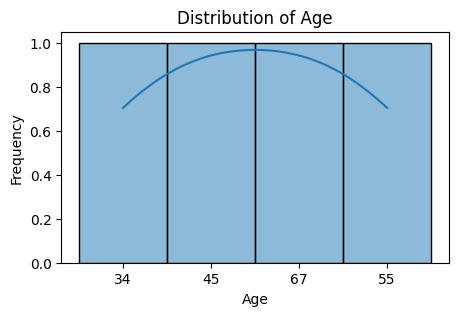

In [ ]:
# Plotting histogram for Age
plt.figure(figsize=(5, 3))
sns.histplot(cdf['Age'], kde=True, bins=5)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

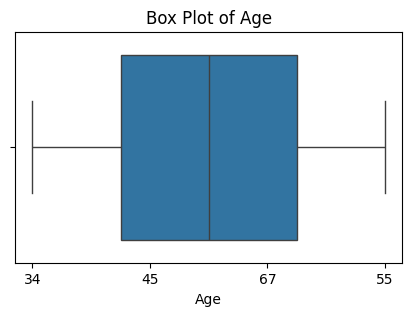

In [ ]:
# Plotting box plot for Age
plt.figure(figsize=(5, 3))
sns.boxplot(x=cdf['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

**Univariate Analysis for Salary**

In [ ]:
# Summary statistics for Salary
print("Summary statistics for Salary:")
print(cdf['Salary'].describe())


Summary statistics for Salary:
count        6
unique       6
top       5000
freq         1
Name: Salary, dtype: object


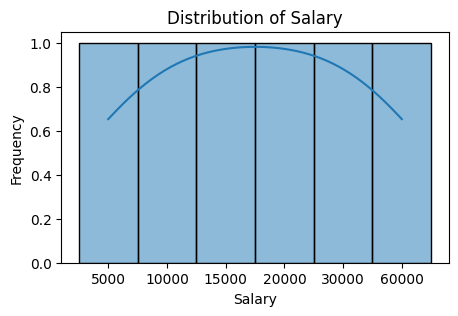

In [ ]:
# Plotting histogram for Salary
plt.figure(figsize=(5, 3))
sns.histplot(cdf['Salary'], kde=True, bins=5)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

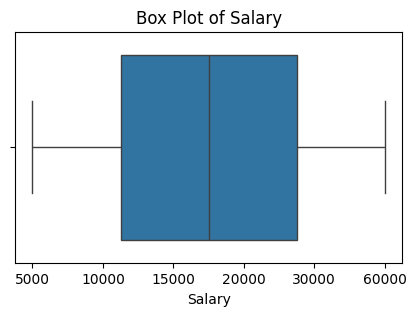

In [ ]:
# Plotting box plot for Salary
plt.figure(figsize=(5, 3))
sns.boxplot(x=cdf['Salary'])
plt.title('Box Plot of Salary')
plt.xlabel('Salary')
plt.show()

**Explanation:**



* df['Age'].describe() and df['Salary'].describe() provide summary statistics such as count, mean, standard deviation, minimum, quartiles, and maximum.
* sns.histplot() plots the histogram and overlays a KDE (kernel density estimate) to visualize the distribution.
* sns.boxplot() helps identify outliers and understand the spread and quartiles of the data.



# **3. Bivariate Analysis**

It is the analysis of two variables to explore the relationship between variables. For example, analyzing how Age relates to Salary or how Experience correlates with Salary.


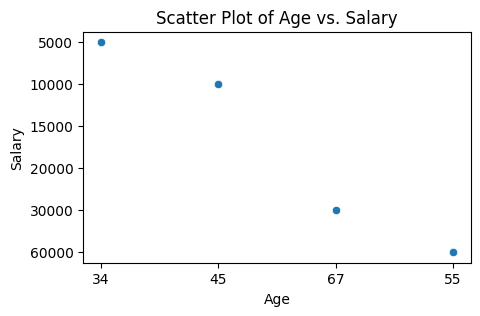

In [ ]:
# Scatter plot for Age vs Salary

plt.figure(figsize=(5, 3))
sns.scatterplot(x='Age', y='Salary', data=cdf)
plt.title('Scatter Plot of Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

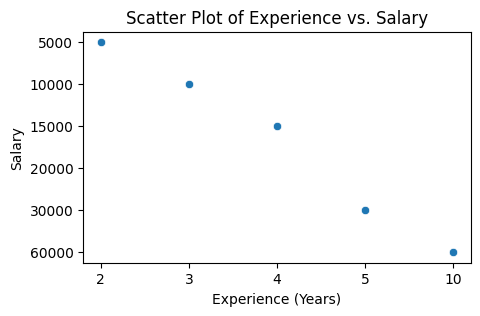

In [ ]:
# Scatter Plot for Experience vs. Salary
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Exp', y='Salary', data=cdf)
plt.title('Scatter Plot of Experience vs. Salary')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.show()

**Explanation:**

*   sns.scatterplot() is used to visualize the relationship between two numerical variables (Age vs. Salary, Exp vs. Salary).
*   This plot helps identify trends (e.g., if salary increases with age or experience).



In [ ]:
# Correlation Matrix
correlation_matrix = cdf[['Age', 'Salary', 'Exp']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             Age    Salary       Exp
Age     1.000000  0.620110  0.552102
Salary  0.620110  1.000000  0.991064
Exp     0.552102  0.991064  1.000000


**Explanation:**

*  df.corr() calculates the correlation between numerical variables.
* A value close to 1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.
* A value around 0 indicates little or no linear correlation.



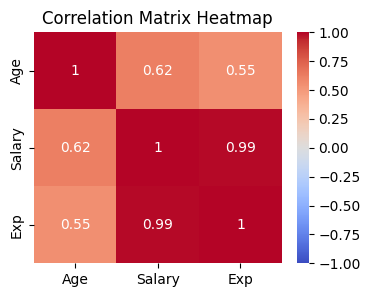

In [ ]:
# Heatmap for correlation matrix

plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


**Explanation:**

sns.heatmap() provides a visual representation of the correlation matrix, highlighting strong and weak relationships.


# **4. Outlier Treatment**

It involves identifying and addressing extreme values in a dataset that deviate significantly from the other observations. Outliers can distort statistical analyses and lead to inaccurate insights or model performance. Common methods for treating outliers include:

* Removing Outliers: Excluding data points that fall outside a certain range (e.g., beyond 1.5 times the interquartile range (IQR)).
* Capping Outliers: Setting a maximum or minimum value to limit the impact of outliers.
* Transformation: Applying transformations like log or square root to reduce the impact of outliers.


**Treat outliers using the Interquartile Range (IQR) method, with an example of handling noisy data.**

**What is the IQR Method?**

The Interquartile Range (IQR) is a measure of statistical dispersion and is used to identify outliers in a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1):

IQR=𝑄3-Q1


Outlier bounds:

Lower Bound: Q1 - 1.5 * IQR

Upper Bound: Q3 + 1.5 * IQR

Any data point outside these bounds is considered an outlier.


In [ ]:
cdf

,Name,Domain,Age,Location,Salary,Exp
0,Mike,Datascience,34,Mumbai,5000,2
1,Teddy,Testing,45,Bangalore,10000,3
2,Umar,Dataanalyst,NaN,NaN,15000,4
3,Jane,Analytics,NaN,Hyderbad,20000,NaN
4,Uttam,Statistics,67,NaN,30000,5
5,Kim,NLP,55,Delhi,60000,10


In [ ]:
# Function to treat outliers using IQR
def treat_outliers_iqr(column):
    Q1 = cdf[column].quantile(0.25)
    Q3 = cdf[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with boundary values
    cdf[column] = cdf[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


# Treat outliers in the numerical columns
for col in ['Age', 'Salary', 'Exp']:
    cdf[col] = pd.to_numeric(cdf[col], errors='coerce')  # Ensure numeric dtype for calculation
    treat_outliers_iqr(col)

print("Updated DataFrame:")
print(cdf)

Updated DataFrame:
    Name       Domain   Age   Location   Salary  Exp
0   Mike  Datascience  34.0     Mumbai   5000.0  2.0
1  Teddy      Testing  45.0  Bangalore  10000.0  3.0
2   Umar  Dataanalyst   NaN        NaN  15000.0  4.0
3   Jane    Analytics   NaN   Hyderbad  20000.0  NaN
4  Uttam   Statistics  67.0        NaN  30000.0  5.0
5    Kim          NLP  55.0      Delhi  51875.0  8.0


# **5. Missing Value Treatment**

It is essential in data preprocessing to ensure the dataset is complete and suitable for analysis or modeling. Missing values can lead to biased results and affect model performance. The approach to handling missing values depends on the nature of the data and the percentage of missing values.

**Common Strategies for Treating Missing Values:**

1. Deletion

  *  Listwise Deletion: Remove rows with missing values (use when missing data is minimal and does not impact analysis).
  * Column Deletion: Remove columns with a large proportion of missing values.



2. Imputation
  * Mean/Median/Mode Imputation: Replace missing values with the mean, median, or mode (useful for numerical data).
  *  Forward/Backward Fill: Fill missing values based on neighboring data.
  * Custom Imputation: Use a specific value or domain knowledge for imputation.


3. Advanced Techniques
  * Predictive Imputation: Use machine learning models to predict and fill missing values.
  * K-Nearest Neighbors (KNN): Impute based on similar data points.

In [ ]:
# Find the null values

print(cdf.isnull().sum())

Name        0
Domain      0
Age         2
Location    2
Salary      0
Exp         1
dtype: int64


In [ ]:
cdf[['Age','Location','Exp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       4 non-null      float64
 1   Location  4 non-null      object 
 2   Exp       5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 272.0+ bytes


In [ ]:
# Convert 'Age' and 'Exp' columns to numeric, coercing errors to NaN

cdf['Age'] = pd.to_numeric(cdf['Age'], errors='coerce')
cdf['Exp'] = pd.to_numeric(cdf['Exp'], errors='coerce')

#Impute the missing values with the median
cdf['Age'].fillna(cdf['Age'].median(),inplace=True)
cdf['Exp'].fillna(cdf['Exp'].median(),inplace=True)

<ipython-input-202-694922a1ee28>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cdf['Age'].fillna(cdf['Age'].median(),inplace=True)
<ipython-input-202-694922a1ee28>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
cdf.isnull().sum()

,0
Name,0
Domain,0
Age,0
Location,2
Salary,0
Exp,0


In [ ]:
# Fill the Location blank values

# Impute 'Location' using mode
cdf['Location'].fillna(cdf['Location'].mode()[0], inplace=True)

<ipython-input-204-48775de0713e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cdf['Location'].fillna(cdf['Location'].mode()[0], inplace=True)


In [ ]:
cdf.isnull().sum()

,0
Name,0
Domain,0
Age,0
Location,0
Salary,0
Exp,0


In [ ]:
# Save the clean data as a seperate sheet

cdf.to_csv('clean_data.csv')

In [ ]:
print(cdf)

    Name       Domain   Age   Location   Salary  Exp
0   Mike  Datascience  34.0     Mumbai   5000.0  2.0
1  Teddy      Testing  45.0  Bangalore  10000.0  3.0
2   Umar  Dataanalyst  50.0  Bangalore  15000.0  4.0
3   Jane    Analytics  50.0   Hyderbad  20000.0  4.0
4  Uttam   Statistics  67.0  Bangalore  30000.0  5.0
5    Kim          NLP  55.0      Delhi  51875.0  8.0


# **6. Variable Creation**

This involves generating new columns based on existing data, which can provide additional information or create more meaningful categorizations.



In [ ]:
# Apply one-hot encoding to the 'Domain' and 'Location' columns
var_cre_df = pd.get_dummies(cdf, columns=['Domain', 'Location'], prefix=['Domain', 'Loc'])

print("Updated DataFrame with One-Hot Encoded Variables:")
print(var_cre_df)

Updated DataFrame with One-Hot Encoded Variables:
    Name   Age   Salary  Exp  Domain_Analytics  Domain_Dataanalyst  \
0   Mike  34.0   5000.0  2.0             False               False   
1  Teddy  45.0  10000.0  3.0             False               False   
2   Umar  50.0  15000.0  4.0             False                True   
3   Jane  50.0  20000.0  4.0              True               False   
4  Uttam  67.0  30000.0  5.0             False               False   
5    Kim  55.0  51875.0  8.0             False               False   

   Domain_Datascience  Domain_NLP  Domain_Statistics  Domain_Testing  \
0                True       False              False           False   
1               False       False              False            True   
2               False       False              False           False   
3               False       False              False           False   
4               False       False               True           False   
5               False      

In [ ]:
print(var_cre_df.columns)

Index(['Name', 'Age', 'Salary', 'Exp', 'Domain_Analytics',
       'Domain_Dataanalyst', 'Domain_Datascience', 'Domain_NLP',
       'Domain_Statistics', 'Domain_Testing', 'Loc_Bangalore', 'Loc_Delhi',
       'Loc_Hyderbad', 'Loc_Mumbai'],
      dtype='object')


# **7. Variable Transformation**

Label Encoding is typically used for converting categorical variables into numerical representations, where each unique category is assigned an integer value. While Label Encoding is mostly used for categorical data, it can also be considered a form of variable transformation when transforming text or categorical data into a numerical format that can be used by machine learning algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

Var_trans_df = cdf.copy()

# Apply Label Encoding to 'Domain' column
Var_trans_df['Domain_Encoded'] = label_encoder.fit_transform(Var_trans_df['Domain'])

print(Var_trans_df)

    Name       Domain   Age   Location   Salary  Exp  Domain_Encoded
0   Mike  Datascience  34.0     Mumbai   5000.0  2.0               2
1  Teddy      Testing  45.0  Bangalore  10000.0  3.0               5
2   Umar  Dataanalyst  50.0  Bangalore  15000.0  4.0               1
3   Jane    Analytics  50.0   Hyderbad  20000.0  4.0               0
4  Uttam   Statistics  67.0  Bangalore  30000.0  5.0               4
5    Kim          NLP  55.0      Delhi  51875.0  8.0               3
